In [1]:
from __future__ import print_function
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [2]:
crop_data = pd.read_csv("crop_recommendation.csv")

In [3]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# N->Nitrogen
# P->Phosphorous
# K->Potassium

In [5]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
# Conclusion: No missing attributes

In [7]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [8]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns

array([[<AxesSubplot: title={'center': 'N'}>,
        <AxesSubplot: title={'center': 'P'}>,
        <AxesSubplot: title={'center': 'K'}>],
       [<AxesSubplot: title={'center': 'temperature'}>,
        <AxesSubplot: title={'center': 'humidity'}>,
        <AxesSubplot: title={'center': 'ph'}>],
       [<AxesSubplot: title={'center': 'rainfall'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

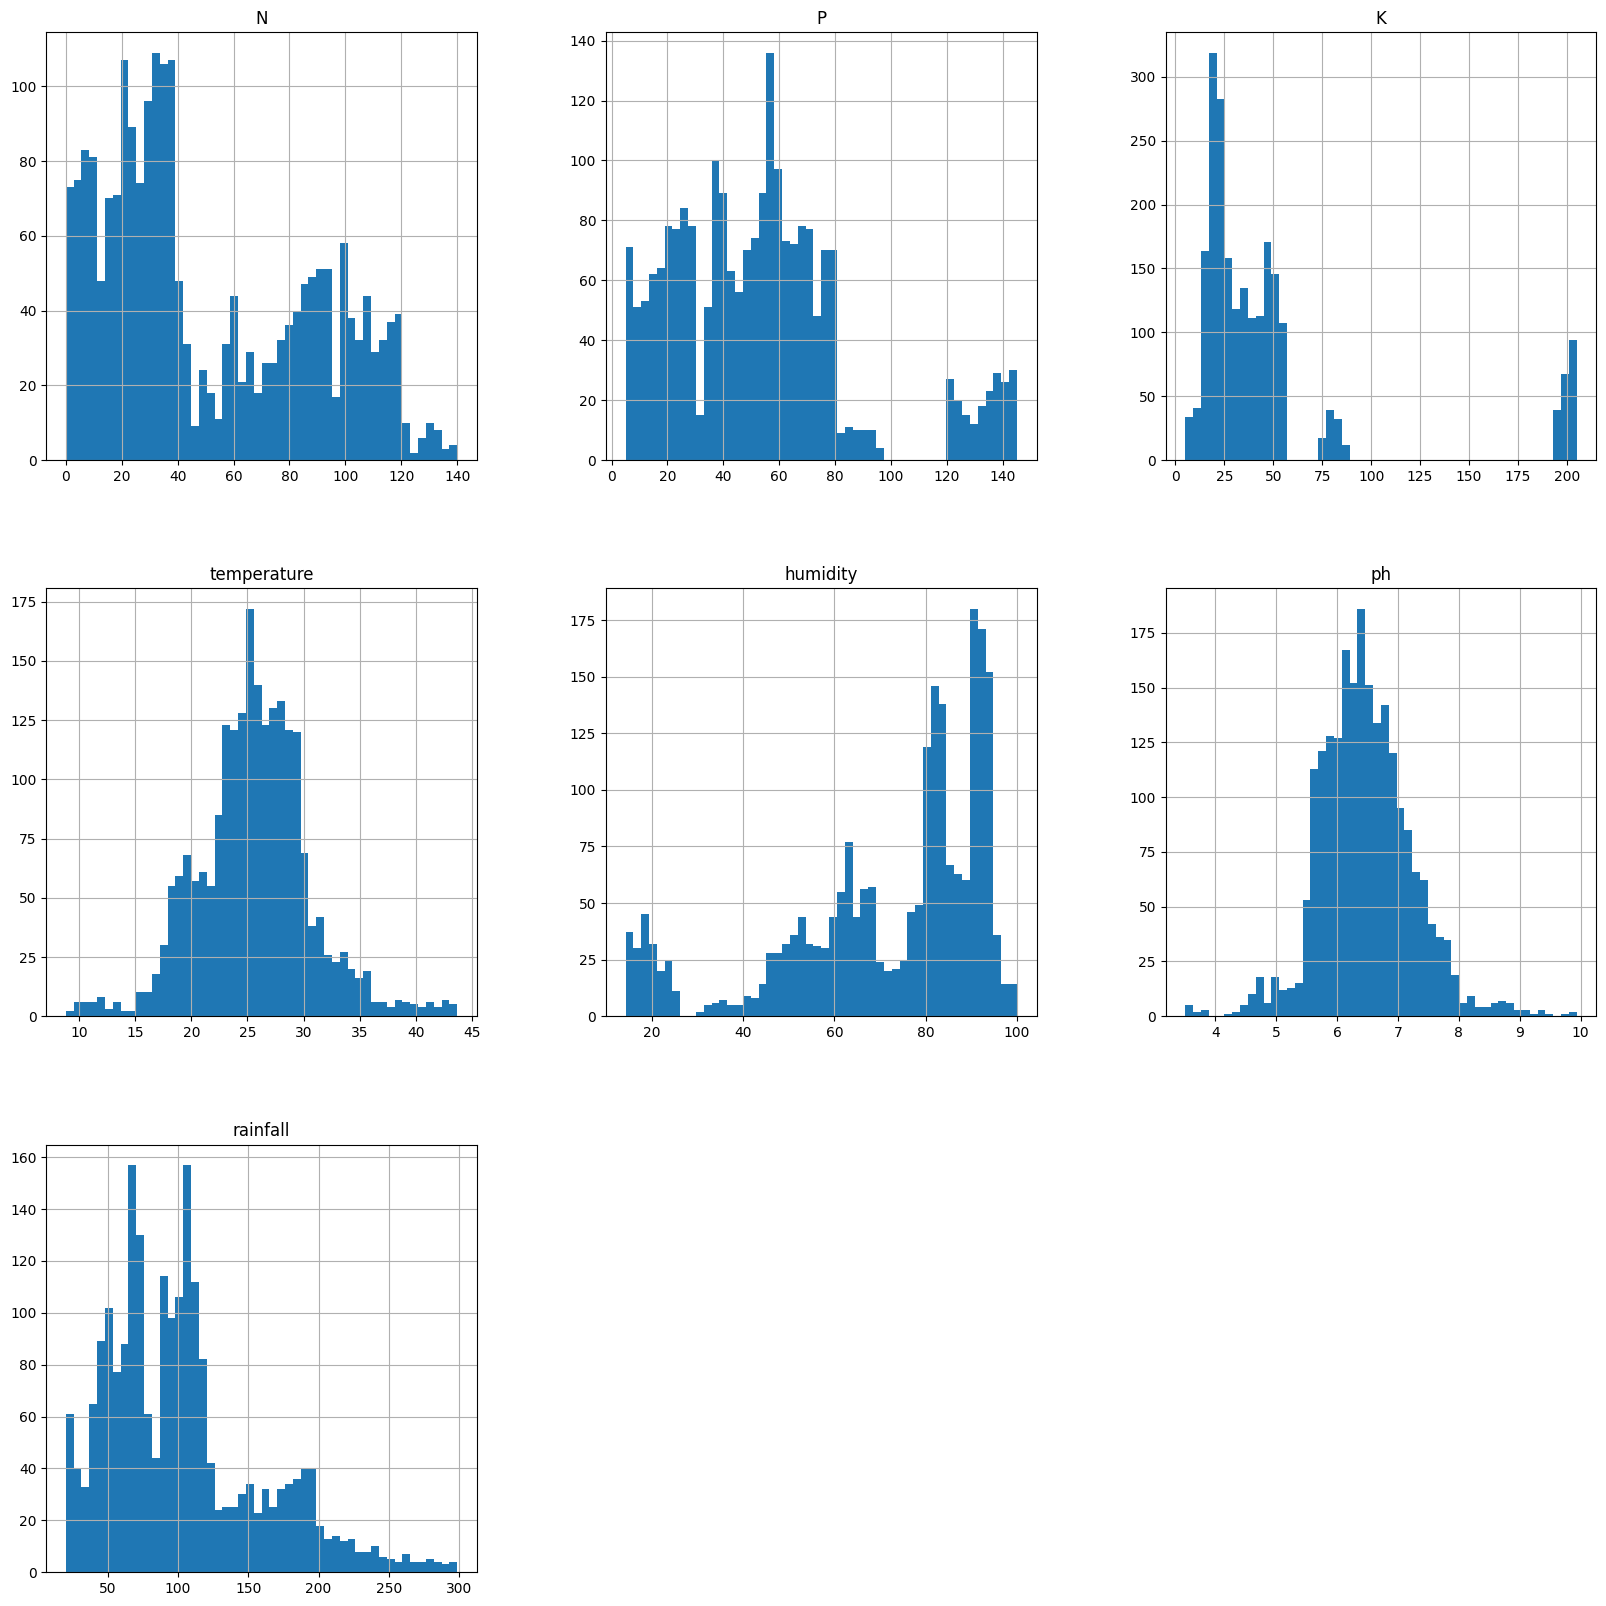

In [10]:
import matplotlib.pyplot as plt
crop_data.hist(bins=50, figsize=(20,20))

<AxesSubplot: xlabel='count', ylabel='label'>

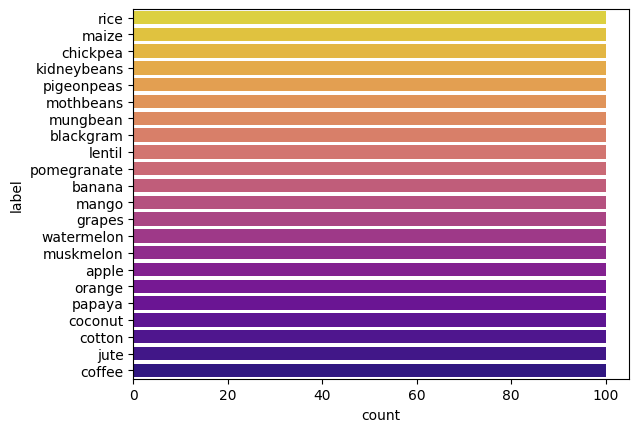

In [11]:
sns.countplot(y='label',data=crop_data, palette="plasma_r")

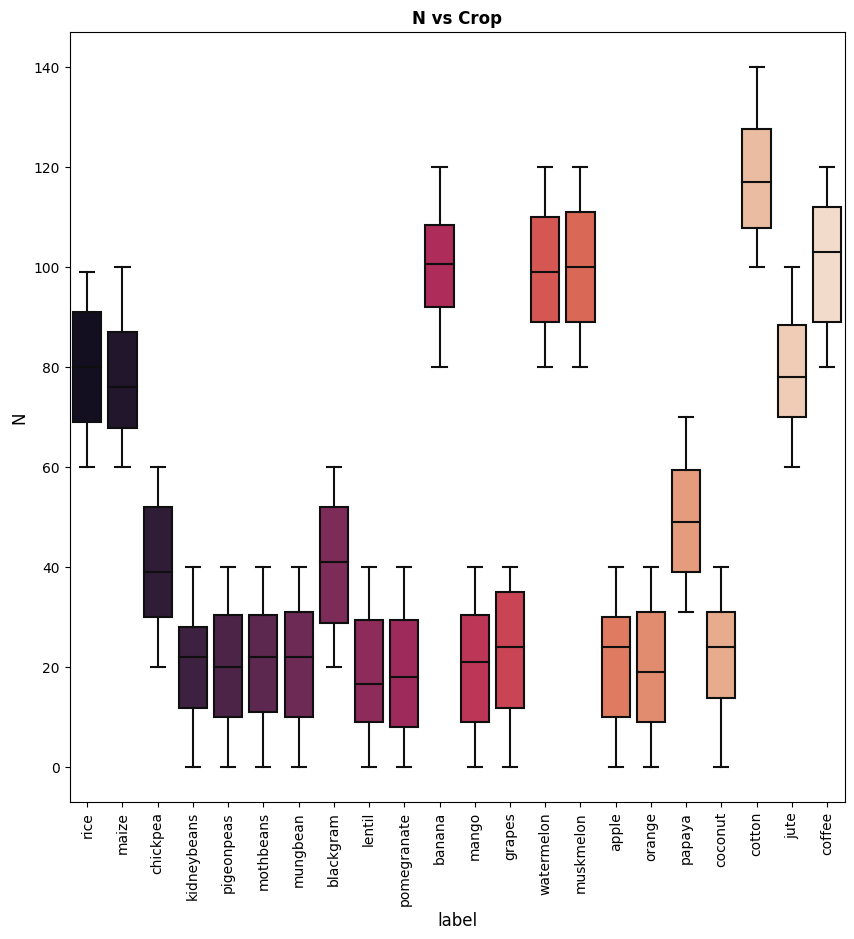

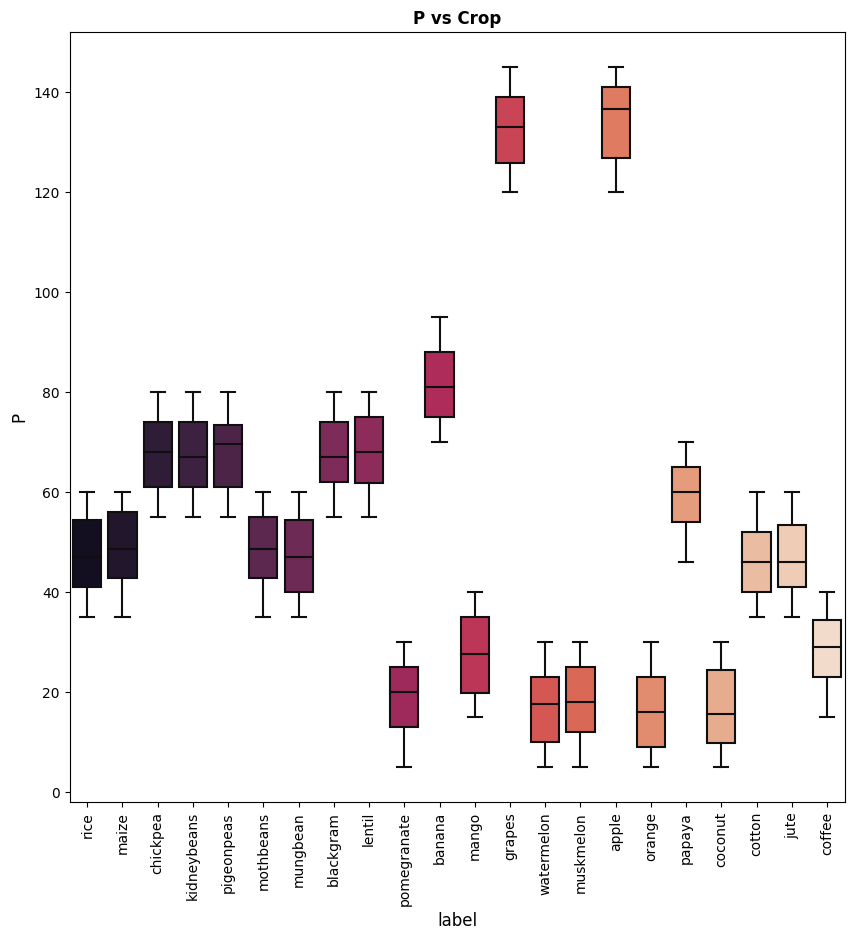

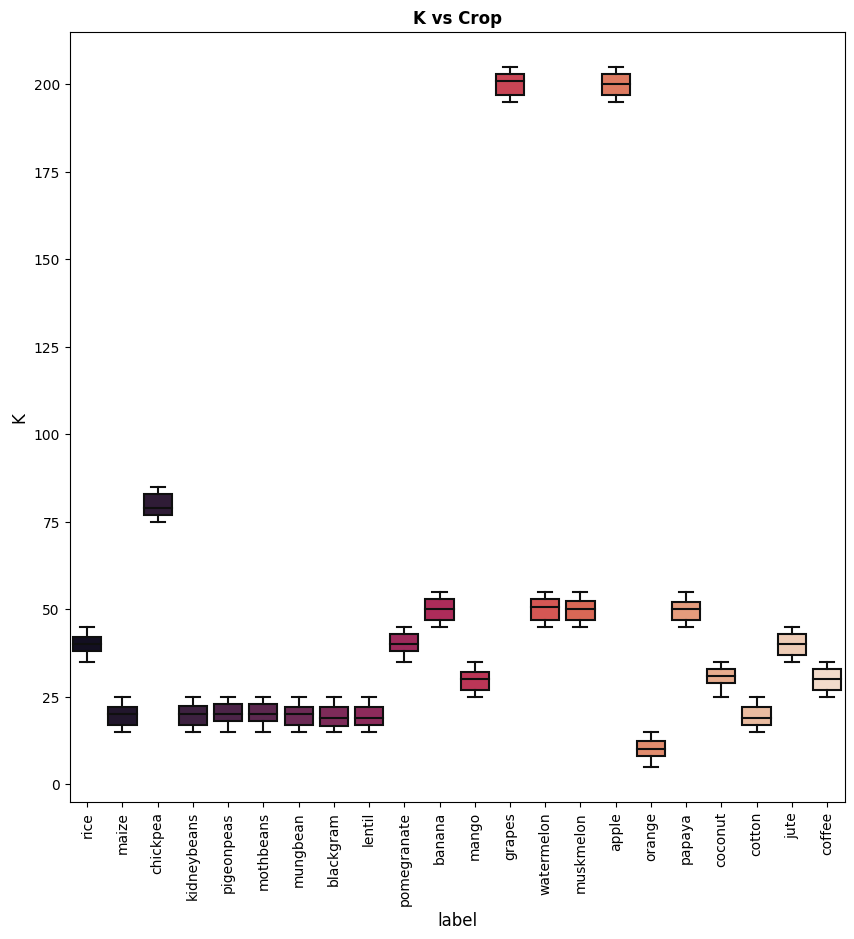

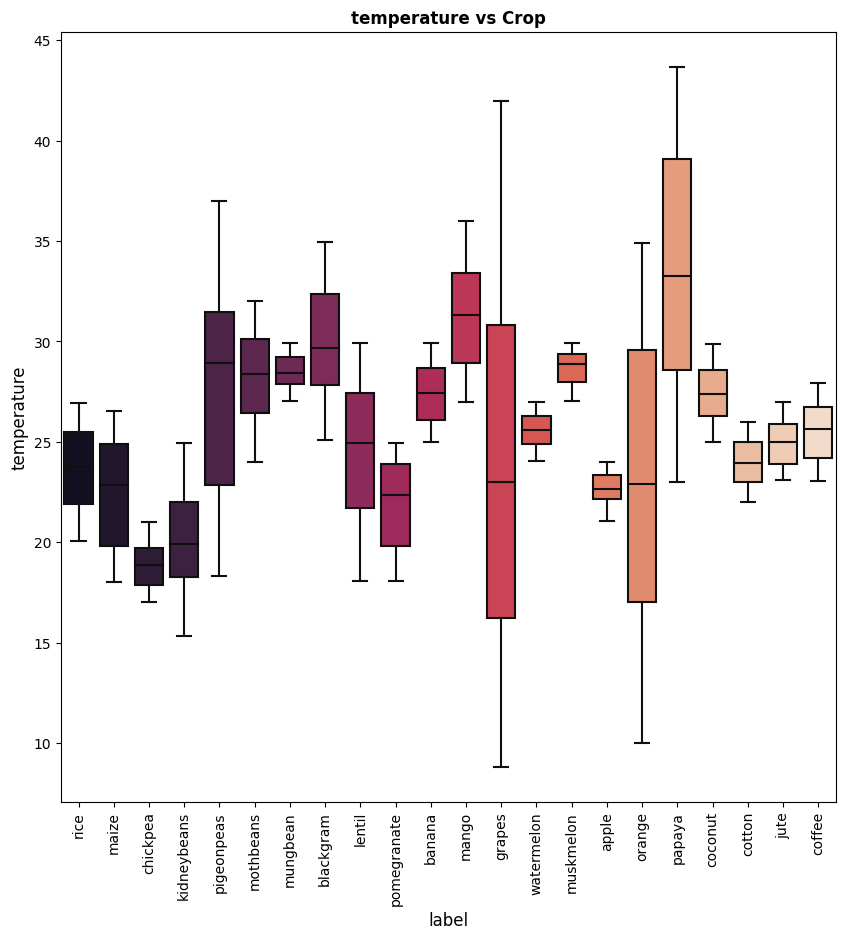

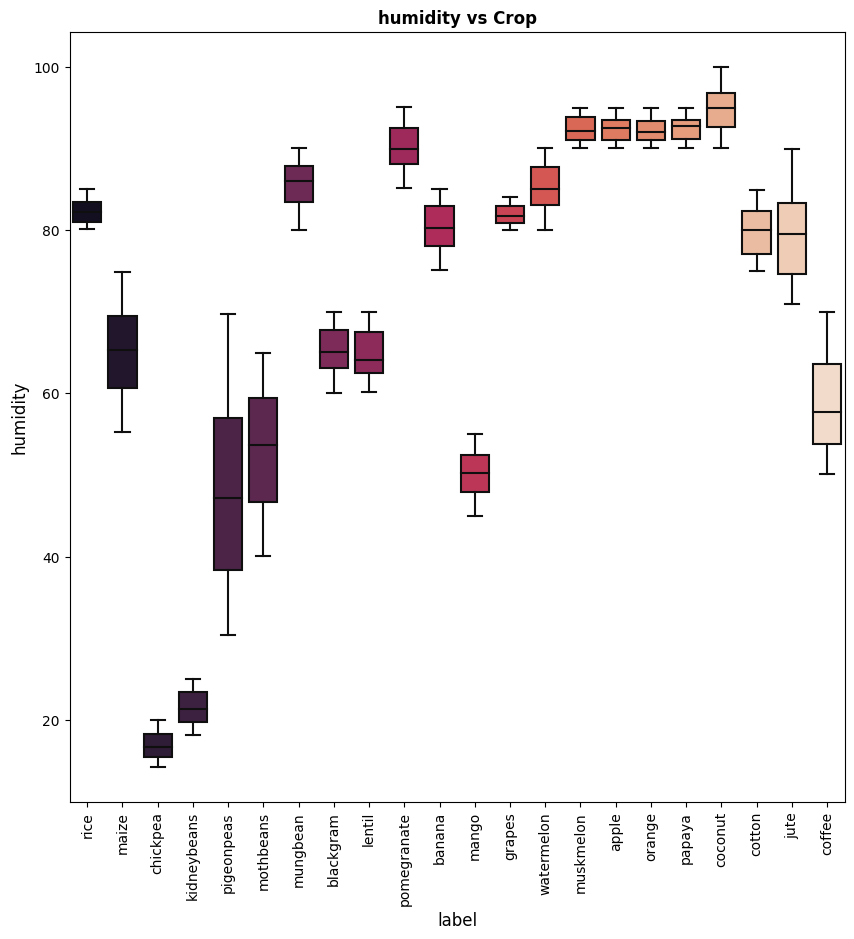

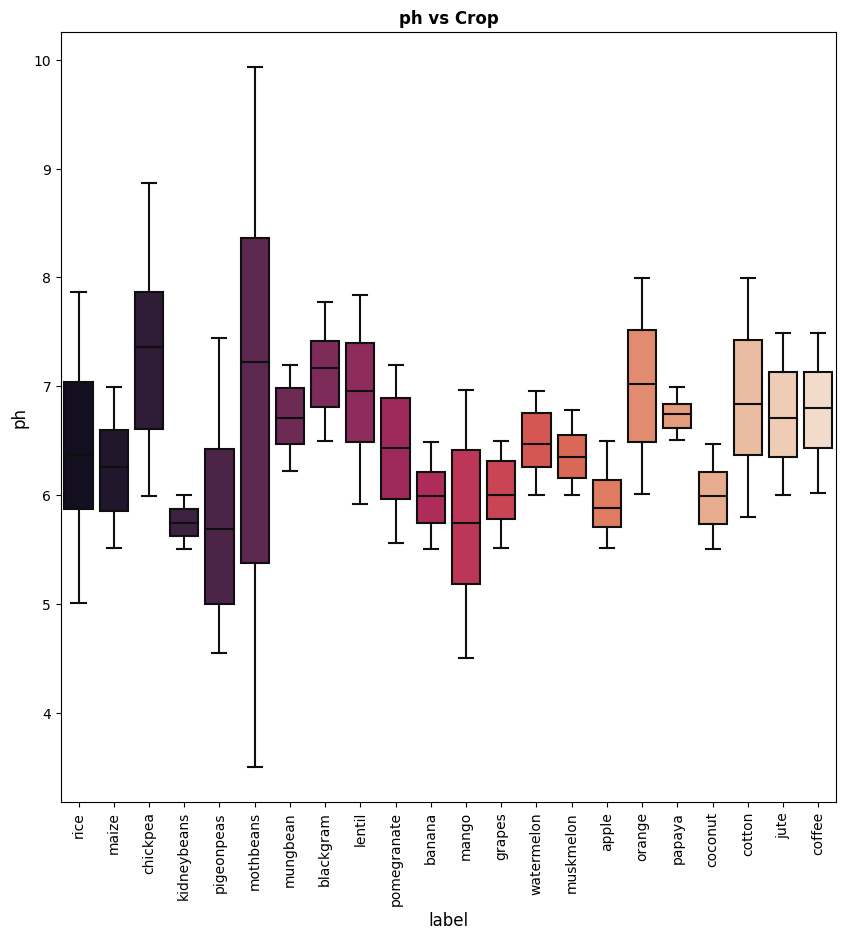

In [12]:
all_colms = crop_data.columns[:-2]
for col in all_colms:
    plt.figure(figsize = (10, 10))
    sns.boxplot(x = 'label', y = col, data = crop_data, palette = 'rocket')
    plt.xlabel('label', fontsize = 12)
    plt.ylabel(col, fontsize = 12)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs Crop', fontweight='bold')
    plt.show()

In [13]:
features = crop_data[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data['label']
labels = crop_data['label']

In [14]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model_name = []
model = []

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(crop_data, crop_data['label']):
    strat_train_set = crop_data.loc[train_index]
    strat_test_set = crop_data.loc[test_index]

In [16]:
# WE are performing this cell to seperate features and labels
# We want to seperate these to apply desired models on them
#strat_train_set.info()
Ytrain = strat_train_set["label"].copy()
Xtrain = strat_train_set.drop("label", axis=1)

Ytest = strat_test_set["label"].copy()
Xtest = strat_test_set.drop("label", axis=1)

#X_train_set.describe()
#Y_train_set.describe()


#X_test_set.describe()
#Y_test_set.describe()

In [17]:
#Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    #...add as many as we want in pipeline....
])

In [19]:
import pickle 
pickle.dump(my_pipeline, open('scaling.pkl','wb'))

In [20]:
Xtrain = my_pipeline.fit_transform(Xtrain)
Xtest = my_pipeline.transform(Xtest)

In [21]:
file=open('static/models_accuracy.txt','w+')

In [22]:
result=""

In [23]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)
DecisionTree.fit(Xtrain,Ytrain)
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model_name.append('Decision Tree')
model.append(DecisionTree)
result+='Decision Tree ->'
result+=str(x)
print("DecisionTrees's Accuracy is: ", x*100)
print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  89.54545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       0.95      1.00      0.98        20
   blackgram       0.61      0.95      0.75        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      0.95      0.97        20
      cotton       0.77      1.00      0.87        20
      grapes       1.00      1.00      1.00        20
        jute       0.00      0.00      0.00        20
 kidneybeans       1.00      0.70      0.82        20
      lentil       0.95      1.00      0.98        20
       maize       0.88      0.70      0.78        20
       mango       1.00      0.85      0.92        20
   mothbeans       1.00      0.65      0.79        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.98        20
      orange       1.00      1.00

In [24]:
file.write(result)

34

In [25]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(Xtrain,Ytrain)
predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model_name.append('Naive Bayes')
model.append(NaiveBayes)
result="\n"
result+='Naive Bayes ->'
result+=str(x)
file.write(result)
print("Naive Bayes's Accuracy is: ", x)
print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.91      1.00      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00 

In [26]:
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model_name.append('SVM')
model.append(SVM)
result="\n"
result+='SVM ->'
result+=str(x)
file.write(result)
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.26136363636363635
              precision    recall  f1-score   support

       apple       1.00      0.30      0.46        20
      banana       1.00      0.40      0.57        20
   blackgram       1.00      0.25      0.40        20
    chickpea       1.00      0.15      0.26        20
     coconut       1.00      0.10      0.18        20
      coffee       1.00      0.20      0.33        20
      cotton       1.00      0.15      0.26        20
      grapes       1.00      0.15      0.26        20
        jute       1.00      0.10      0.18        20
 kidneybeans       1.00      0.20      0.33        20
      lentil       1.00      0.05      0.10        20
       maize       1.00      0.20      0.33        20
       mango       1.00      0.40      0.57        20
   mothbeans       0.75      0.15      0.25        20
    mungbean       1.00      0.55      0.71        20
   muskmelon       1.00      0.45      0.62        20
      orange       1.00      0.15      0.

In [27]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model_name.append('Logistic Regression')
model.append(LogisticRegression)
result="\n"
result+='Logistic Regression ->'
result+=str(x)
file.write(result)
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9431818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.68      0.65      0.67        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      0.95      0.97        20
      coffee       1.00      1.00      1.00        20
      cotton       0.80      1.00      0.89        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.89      0.85      0.87        20
       maize       0.83      0.75      0.79        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.75      0.75      0.75        20
    mungbean       1.00      0.95      0.97        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00   

In [28]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model_name.append('RF')
model.append(RF)
result="\n"
result+='Random Forest Classifier ->'
result+=str(x)
file.write(result)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.91      1.00      0.95        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00 

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

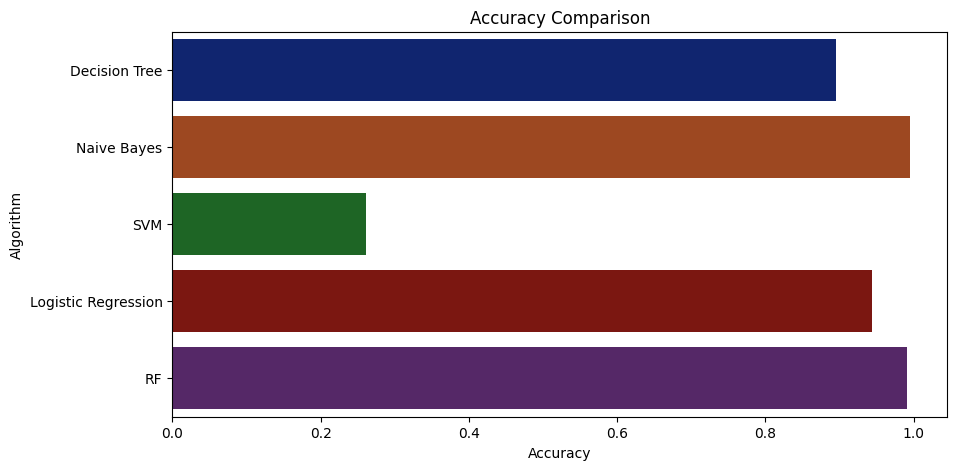

In [29]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model_name,palette='dark')

In [30]:
accuracy_models = dict(zip(model, acc))
accuracy=0;
for k, v in accuracy_models.items():
    if accuracy<v:
        final_model=k;
    print (k, '-->', v)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2) --> 0.8954545454545455
GaussianNB() --> 0.9954545454545455
SVC(gamma='auto') --> 0.26136363636363635
<class 'sklearn.linear_model._logistic.LogisticRegression'> --> 0.9431818181818182
RandomForestClassifier(n_estimators=20, random_state=0) --> 0.990909090909091


In [31]:
accuracy_models = dict(zip(model_name, acc))
accuracy=0;
for k, v in accuracy_models.items():
    if accuracy<v:
        final_model_name=k;
    print (k, '-->', v)

Decision Tree --> 0.8954545454545455
Naive Bayes --> 0.9954545454545455
SVM --> 0.26136363636363635
Logistic Regression --> 0.9431818181818182
RF --> 0.990909090909091


In [32]:
final_model

RandomForestClassifier(n_estimators=20, random_state=0)

In [33]:
data = np.array([[38,38,18,26.310518,61.187491,6.294130,35.734038]])
prediction = RF.predict(data)
print(prediction)

['mothbeans']


In [34]:
data = np.array([[38,38,18,26.310518,61.187491,6.294130,35.734038]])
prediction = LogReg.predict(data)
print(prediction)

['mothbeans']


In [35]:
data = np.array([[38,38,18,26.310518,61.187491,6.294130,35.734038]])
prediction = SVM.predict(data)
print(prediction)

['mothbeans']


In [36]:
data = np.array([[38,38,18,26.310518,61.187491,6.294130,35.734038]])
prediction = NaiveBayes.predict(data)
print(prediction)

['mothbeans']


In [37]:
data = np.array([[38,38,18,26.310518,61.187491,6.294130,35.734038]])
prediction = DecisionTree.predict(data)
print(prediction)

['lentil']


In [38]:
import pickle
pickle.dump(final_model, open('crop_recommender_model.pkl','wb'))


In [39]:
pickled_model=pickle.load(open('crop_recommender_model.pkl','rb'))

In [40]:
features= np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction=pickled_model.predict(features)
print(prediction)

['coffee']


In [41]:
result="\n"
result+= 'Model being used currently->'
result+=str(final_model_name)
file.write(result)

31

In [42]:
file.close()